In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
raw_sbif_data = pd.read_csv("/Users/Nish/class/project1/Group-Project/Resources/SBIF_table.csv")
raw_sbif_data = raw_sbif_data.reset_index()
raw_sbif_data = raw_sbif_data.rename(columns=raw_sbif_data.iloc[0])
raw_sbif_data = raw_sbif_data.drop(raw_sbif_data.index[0])
raw_sbif_data

,0,Month,Year,Grant Amount,Leveraged Resources,Month - Numeric,Year-Month
1,1,January,2011,446992.74,301234.12,1,2011-01
2,2,February,2011,550624.85,558775.10,2,2011-02
3,3,March,2011,2479399.55,2964604.20,3,2011-03
4,4,April,2011,283541.81,436046.92,4,2011-04
5,5,May,2011,940904.74,1555789.72,5,2011-05
...,...,...,...,...,...,...,...
94,94,October,2018,280571.15,241911.02,10,2018-10
95,95,November,2018,527944.49,298428.08,11,2018-11
96,96,December,2018,557061.88,331886.50,12,2018-12
97,97,January,2019,959093.24,1041513.08,1,2019-01


In [3]:
sbif_data = raw_sbif_data[["Month - Numeric", "Year", "Grant Amount"]]
sbif_data

,Month - Numeric,Year,Grant Amount
1,1,2011,446992.74
2,2,2011,550624.85
3,3,2011,2479399.55
4,4,2011,283541.81
5,5,2011,940904.74
...,...,...,...
94,10,2018,280571.15
95,11,2018,527944.49
96,12,2018,557061.88
97,1,2019,959093.24


In [4]:
sbif_data["Grant Amount"]

1      446992.74
2      550624.85
3     2479399.55
4      283541.81
5      940904.74
         ...    
94     280571.15
95     527944.49
96     557061.88
97     959093.24
98     980511.29
Name: Grant Amount, Length: 98, dtype: object

In [5]:
##sbif_data["Grant Amount"] = pd.Series([sbif_data["Grant Amount"]])
##sbif_data["Grant Amount"] = pd.to_numeric(sbif_data["Grant Amount"], downcast = "float")
sbif_data["Grant Amount"] = sbif_data["Grant Amount"].astype(float)

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
sbif_data = sbif_data.groupby("Year").sum()
sbif_data

,Grant Amount
Year,
2011,10827639.88
2012,13709649.19
2013,10014629.51
2014,8077828.00
2015,7159098.44
2016,7385907.77
2017,7748050.14
2018,5882511.29
2019,1939604.53


Text(0.5, 1.0, 'Grants allocated by City of Chicago via Small Business Improvement Fund (SBIF)')

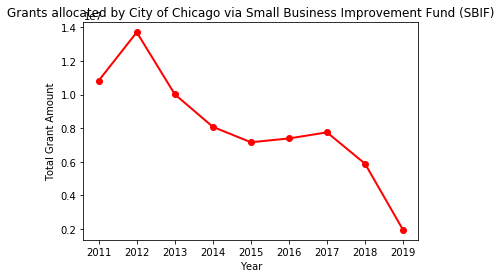

In [7]:
x = sbif_data.index
y = sbif_data["Grant Amount"]
plt.plot(x,y, linewidth=2, marker = 'o', color = 'r')
plt.xlabel("Year")
plt.ylabel("Total Grant Amount")
plt.title("Grants allocated by City of Chicago via Small Business Improvement Fund (SBIF)")

In [8]:
med_prices = pd.read_csv("/Users/Nish/class/project1/Group-Project/Resources/medianhomeprice.csv")
med_prices = med_prices.reset_index()
med_prices = med_prices.rename(columns=med_prices.iloc[0])
med_prices = med_prices.drop(med_prices.index[0])
med_prices

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
1,"Chicago, IL",Feb-12,$133K,-5.80%,-1.30%,"1,566",11.10%,9.90%,"3,588",22.90%,8.00%,"13,635",2.10%,-22.60%,93,4,5,94.80%,-0.20%,-1.10%
2,"Chicago, IL",Mar-12,$155K,16.30%,3.30%,"2,006",28.10%,8.10%,"4,084",13.80%,-13.10%,"13,740",0.80%,-23.60%,98,5,7,95.20%,0.40%,-0.80%
3,"Chicago, IL",Apr-12,$170K,9.70%,12.20%,"2,192",9.30%,14.60%,"3,795",-7.10%,-2.10%,"13,645",-0.70%,-23.80%,74,-24,-23,95.50%,0.20%,-0.10%
4,"Chicago, IL",May-12,$192K,12.60%,11.70%,"2,493",13.70%,15.90%,"3,856",1.60%,2.60%,"13,462",-1.30%,-24.50%,66,-8,-16,96.20%,0.70%,0.00%
5,"Chicago, IL",Jun-12,$199K,3.70%,5.70%,"2,748",10.20%,21.10%,"3,478",-9.80%,-5.20%,"13,089",-2.80%,-25.10%,60,-6,-21,96.30%,0.20%,1.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25477,"Chicago, IL - Wrigleyville",Jan-20,$479K,5.20%,12.60%,14,-26.30%,55.60%,17,54.50%,142.90%,18,0.00%,80.00%,93,39,21,98.60%,0.10%,1.80%
25478,"Chicago, IL - Wrigleyville",Feb-20,$525K,9.70%,24.30%,11,-21.40%,22.20%,26,52.90%,100.00%,25,38.90%,56.30%,91,-2,19,98.20%,-0.40%,1.30%
25479,"Chicago, IL - Wrigleyville",Mar-20,$475K,-9.50%,18.80%,12,9.10%,33.30%,28,7.70%,3.70%,23,-8.00%,-8.00%,75,-17,3,98.60%,0.40%,0.80%
25480,"Chicago, IL - Wrigleyville",Apr-20,$485K,2.10%,15.50%,17,41.70%,88.90%,25,-10.70%,-32.40%,19,-17.40%,-24.00%,58,-17,23,97.70%,-0.90%,-1.30%


In [9]:
med_prices.dtypes

Region                       object
Month of Period End          object
Median Sale Price            object
Median Sale Price MoM        object
Median Sale Price YoY        object
Homes Sold                   object
Homes Sold MoM               object
Homes Sold YoY               object
New Listings                 object
New Listings MoM             object
New Listings YoY             object
Inventory                    object
Inventory MoM                object
 Inventory YoY               object
Days on Market               object
Days on Market MoM           object
Days on Market YoY           object
Average Sale To List         object
Average Sale To List MoM     object
Average Sale To List YoY     object
dtype: object

In [10]:
dom_yoy = med_prices[["Month of Period End", "Days on Market YoY"]]
dom_yoy

,Month of Period End,Days on Market YoY
1,Feb-12,5
2,Mar-12,7
3,Apr-12,-23
4,May-12,-16
5,Jun-12,-21
...,...,...
25477,Jan-20,21
25478,Feb-20,19
25479,Mar-20,3
25480,Apr-20,23


In [11]:
date=dom_yoy["Month of Period End"].str.split("-",n = 2, expand = True)
Year = date[1]
pd.to_numeric(Year)
Year = pd.to_numeric(Year) + 2000
Year

1        2012
2        2012
3        2012
4        2012
5        2012
         ... 
25477    2020
25478    2020
25479    2020
25480    2020
25481    2020
Name: 1, Length: 25481, dtype: int64

In [12]:
dom_yoy["Year"]= Year
dom_yoy = dom_yoy.drop(columns = ["Month of Period End"])
dom_yoy

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Days on Market YoY,Year
1,5,2012
2,7,2012
3,-23,2012
4,-16,2012
5,-21,2012
...,...,...
25477,21,2020
25478,19,2020
25479,3,2020
25480,23,2020


In [13]:
dom_yoy["Days on Market YoY"] = dom_yoy["Days on Market YoY"].astype(float)
dom_yoy["Days on Market YoY"] = dom_yoy["Days on Market YoY"].round()
dom_yoy = dom_yoy.groupby("Year").mean()
dom_yoy

,Days on Market YoY
Year,
2012,-18.577810
2013,-19.988337
2014,-6.095317
2015,2.761556
2016,-4.982661
2017,-1.136849
2018,-0.730936
2019,2.576859
2020,-1.242498


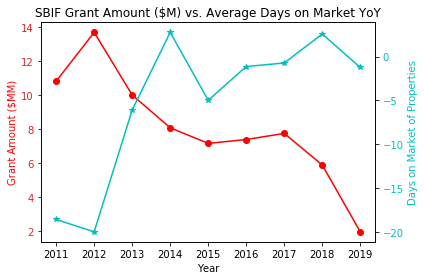

In [14]:
x = sbif_data.index
y1 = sbif_data["Grant Amount"]
y2 = dom_yoy["Days on Market YoY"]

fig, ax1 = plt.subplots()

color = "red"
ax1.set_xlabel('Year')
ax1.set_ylabel('Grant Amount ($MM)', color=color)
ax1.plot(x, y1, marker = 'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
##ax1.set_yticks([2, 4, 6, 8, 10, 12, 14])
ax1.set_yticklabels(["0","2", "4", "6", "8", "10", "12", "14"], color="tab:red", size=10)

##yticks = np.arange(2, 8, 14)
##ax1.set_yticks(yticks)

#ax1.get_yticks()
#array([-1.,  0.,  1.,  2.,  3.,  4.])

ax2 = ax1.twinx()

color = "c"
ax2.set_ylabel('Days on Market of Properties', color=color)
ax2.plot(x, y2, marker = '*', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("SBIF Grant Amount ($M) vs. Average Days on Market YoY")
fig.tight_layout()
plt.show()

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


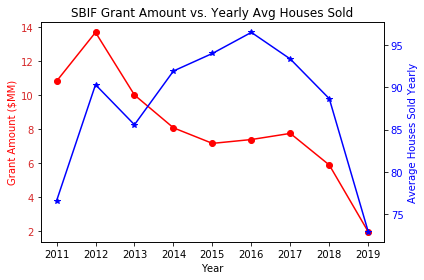

In [15]:
homes_sold = med_prices[["Month of Period End", "Homes Sold"]]
date=homes_sold["Month of Period End"].str.split("-",n = 2, expand = True)
Year = date[1]
pd.to_numeric(Year)
Year = pd.to_numeric(Year) + 2000
homes_sold["Year"]= Year
homes_sold = homes_sold.drop(columns = ["Month of Period End"])
homes_sold["Homes Sold"] = homes_sold["Homes Sold"].str.replace(',', '')

homes_sold["Homes Sold"] = homes_sold["Homes Sold"].astype(int)
homes_sold["Homes Sold"] = homes_sold["Homes Sold"].round()
homes_sold = homes_sold.groupby("Year").mean()


x = sbif_data.index
y1 = sbif_data["Grant Amount"]
y2 = homes_sold["Homes Sold"]




fig, ax1 = plt.subplots()

color = "red"
ax1.set_xlabel('Year')
ax1.set_ylabel('Grant Amount ($MM)', color=color)
ax1.plot(x, y1, marker = 'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
##ax1.set_yticks([2, 4, 6, 8, 10, 12, 14])
ax1.set_yticklabels(["0","2", "4", "6", "8", "10", "12", "14"], color="tab:red", size=10)

##yticks = np.arange(2, 8, 14)
##ax1.set_yticks(yticks)

#ax1.get_yticks()
#array([-1.,  0.,  1.,  2.,  3.,  4.])

ax2 = ax1.twinx()

color = "blue"
ax2.set_ylabel('Average Houses Sold Yearly', color=color)
ax2.plot(x, y2, marker = '*', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("SBIF Grant Amount vs. Yearly Avg Houses Sold")
fig.tight_layout()
plt.show()

In [16]:
#Building Permits and SBIF Grant Amount

raw_permit = pd.read_csv("/Users/Nish/class/project1/Group-Project/Group-Project/Resources/permit_count.csv")
date1=raw_permit["month_year"].str.split("-",n = 2, expand = True)
raw_permit = raw_permit.join(date1)
raw_permit.rename(columns = {0 : "YEAR", 1: "MONTH"}, inplace = True)
raw_permit

,month_year,ID,PERMIT#,ISSUE_DATE,LATITUDE,LONGITUDE,LOCATION,YEAR,MONTH
0,2006-01,3978,3978,3978,3978,3978,3978,2006,01
1,2006-02,3829,3829,3829,3829,3829,3829,2006,02
2,2006-03,4718,4718,4718,4718,4718,4718,2006,03
3,2006-04,3774,3774,3774,3774,3774,3774,2006,04
4,2006-05,4188,4188,4188,4188,4188,4188,2006,05
...,...,...,...,...,...,...,...,...,...
170,2020-03,3667,3667,3667,3667,3667,3667,2020,03
171,2020-04,3225,3225,3225,3225,3225,3225,2020,04
172,2020-05,3045,3045,3045,3045,3045,3045,2020,05
173,2020-06,3612,3612,3612,3612,3612,3612,2020,06


In [25]:
permit_count = raw_permit[["PERMIT#", "YEAR"]]
permit_count = permit_count.groupby("YEAR").sum()
permit_count

,PERMIT#
YEAR,
2006,46697
2007,47682
2008,41168
2009,39973
2010,38894
2011,36696
2012,38421
2013,40403
2014,43879


In [28]:
permit_slice = permit_count.iloc[5:14]
permit_slice

,PERMIT#
YEAR,
2011,36696
2012,38421
2013,40403
2014,43879
2015,44522
2016,45891
2017,47167
2018,46885
2019,48516


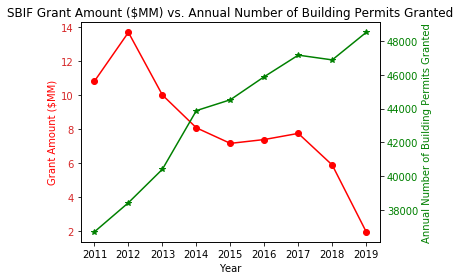

In [31]:
x = sbif_data.index
y1 = sbif_data["Grant Amount"]
y2 = permit_slice["PERMIT#"]

fig, ax1 = plt.subplots()

color = "red"
ax1.set_xlabel('Year')
ax1.set_ylabel('Grant Amount ($MM)', color=color)
ax1.plot(x, y1, marker = 'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
##ax1.set_yticks([2, 4, 6, 8, 10, 12, 14])
ax1.set_yticklabels(["0","2", "4", "6", "8", "10", "12", "14"], color="tab:red", size=10)

##yticks = np.arange(2, 8, 14)
##ax1.set_yticks(yticks)

#ax1.get_yticks()
#array([-1.,  0.,  1.,  2.,  3.,  4.])

ax2 = ax1.twinx()

color = "g"
ax2.set_ylabel('Annual Number of Building Permits Granted', color=color)
ax2.plot(x, y2, marker = '*', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("SBIF Grant Amount ($MM) vs. Annual Number of Building Permits Granted")
fig.tight_layout()
plt.show()